# Import libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import data

In [12]:
dataset = pd.read_csv('avocado.csv')
dataset.shape

(18249, 14)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [14]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Drop the first colum "Unnamed"

In [15]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory analysis

The correlation matrix:


Text(0.5, 1.0, 'Average price')

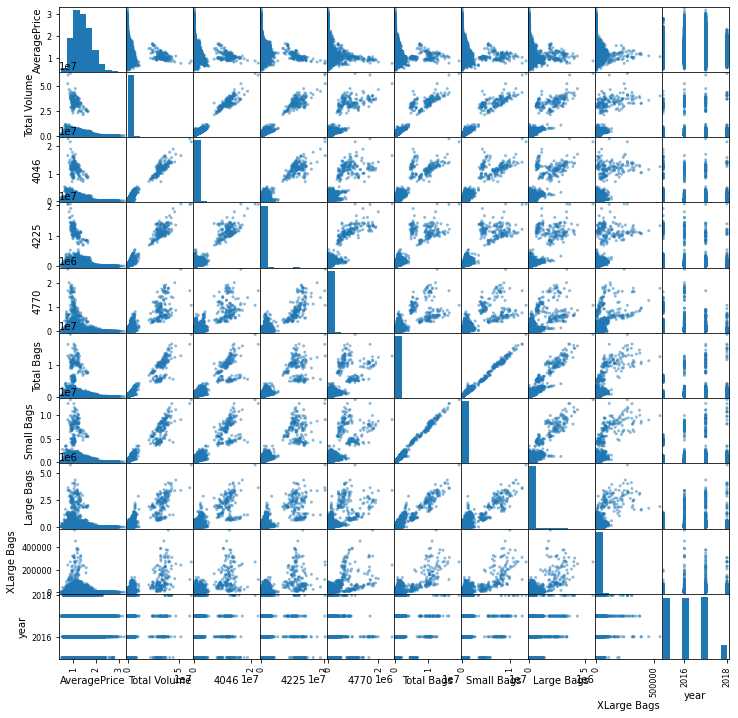

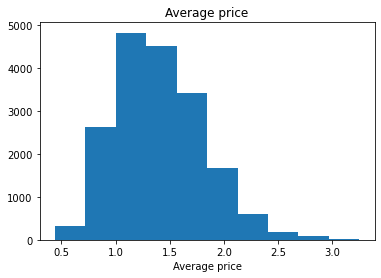

In [18]:
# Scatter plot of the data
from pandas.plotting import scatter_matrix

scatter_matrix(dataset,figsize = (12,12))
print('The correlation matrix:')
corr_mtx = dataset.corr()
corr_mtx.round(2)

plt.figure()
dataset_array = dataset.to_numpy()
price = dataset_array[:,1]
plt.hist(price)
plt.xlabel('Average price')
plt.title('Average price')

In [19]:
corr_mtx['AveragePrice'].abs().sort_values(ascending = False)

AveragePrice    1.000000
4046            0.208317
Total Volume    0.192752
4770            0.179446
Total Bags      0.177088
Small Bags      0.174730
Large Bags      0.172940
4225            0.172928
XLarge Bags     0.117592
year            0.093197
Name: AveragePrice, dtype: float64

# Train-Test Split and Standarization

In [20]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## convert the datafram to numpy array
dataset_array = dataset.to_numpy()

## need to figure out what features are going to be used
X,y = dataset_array[:,:12],dataset_array[:,1]

## Splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
# standarization
std_trans = StandardScaler()
X_train = std_trans.fit_transform(X_train)
X_test = std_trans.transform(X_test)